# Data Analyst Professional - Practical Exam

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Importing Data

In [3]:
#project data
df = pd.read_csv("product_sales.csv")
print("Product Sales Loaded")

Product Sales Loaded


## EDA

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [430]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [431]:
df.week.value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

Text(0.5, 1.0, 'Count of Sales by Week')

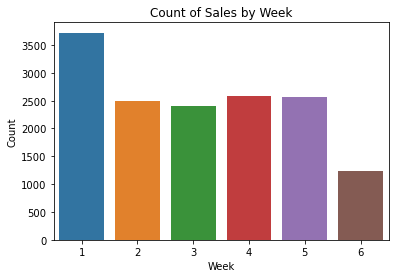

In [432]:
sns.countplot(x = 'week', data = df)
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Count of Sales by Week')

Only 1-6 weeks since launch is in the data which is weird

In [433]:
df.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

Text(0.5, 1.0, 'Count of Sales Method')

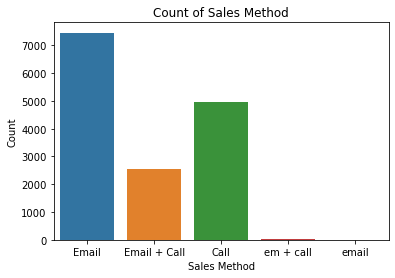

In [434]:
sns.countplot(x = 'sales_method', data = df)
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.title('Count of Sales Method')

Easily fall into three categories with some manipulation

In [435]:
df.customer_id.nunique()

15000

All customers in this data are unique which is surprising

[]

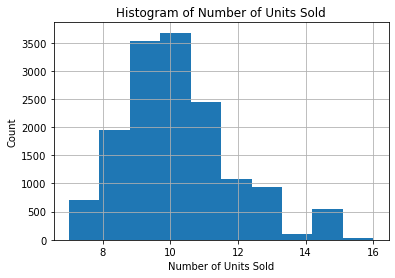

In [436]:
df.hist(column = 'nb_sold')
plt.xlabel('Number of Units Sold')
plt.ylabel('Count')
plt.title('Histogram of Number of Units Sold')
plt.plot()

No nulls or major outliers in number of units sold. We don't know what product is sold however.

In [437]:
df.revenue.describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

There are 1074 nulls in the revenue column

In [438]:
df[df.revenue.isnull()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
16,2,Email,0f744f79-1588-4e0c-8865-fdaecc7f6dd4,10,NaN,6,30,Pennsylvania
17,6,Email + Call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin
28,5,Email,f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad,12,NaN,4,32,Florida
...,...,...,...,...,...,...,...,...
14951,5,Call,5f1c099a-3cf2-4c32-91f0-5ec802926073,10,NaN,10,25,Virginia
14957,1,Call,b7947946-8b0a-4031-8835-226200f260a5,7,NaN,5,23,Illinois
14970,4,Email + Call,72be03aa-25b1-4574-b358-74118cd8d81a,12,NaN,12,25,Washington
14992,5,em + call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York


In [439]:
#need this cleaning step prior to visualization below
#replacing values so that there are only three categories as described
df.sales_method.replace({"em + call" : "Email + Call", "email" : "Email"}, inplace = True)
df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

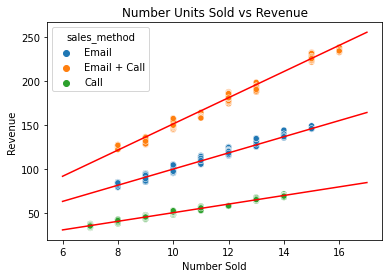

In [440]:
sns.scatterplot(x = 'nb_sold', y = 'revenue', data = df, hue = 'sales_method')
plt.xlabel('Number Sold')
plt.ylabel('Revenue')
plt.title('Number Units Sold vs Revenue')
X_plot_ec = np.linspace(6, 17, 100)
Y_plot_ec = a_email_call*X_plot_ec+b_email_call
plt.plot(X_plot_ec, Y_plot_ec, color = 'r')

X_plot_e = np.linspace(6, 17, 100)
Y_plot_e = a_email*X_plot_e+b_email
plt.plot(X_plot_e, Y_plot_e, color = 'r')

X_plot_c = np.linspace(6, 17, 100)
Y_plot_c = a_call*X_plot_c+b_call
plt.plot(X_plot_c, Y_plot_c, color = 'r')

In [441]:
#looking at nulls
df[df.revenue.isnull()].sales_method.value_counts()

Email           544
Email + Call    349
Call            181
Name: sales_method, dtype: int64

In [442]:
#percentage of revenue nulls in each category
df[df.revenue.isnull()].sales_method.value_counts() / df.sales_method.value_counts()

Call            0.036477
Email           0.072864
Email + Call    0.135692
Name: sales_method, dtype: float64

In [443]:
df_no_null = df[~df.revenue.isnull()]

In [444]:
a_email_call, b_email_call = np.polyfit(df_no_null.loc[(df_no_null.sales_method == 'Email + Call'), 'nb_sold'], \
                                        df_no_null.loc[(df_no_null.sales_method == 'Email + Call'), 'revenue'], 1)

In [445]:
print(a_email_call * 15 + b_email_call, b_email_call)

225.56742672415064 2.0791801432742627


In [446]:
a_email, b_email = np.polyfit(df_no_null.loc[(df_no_null.sales_method == 'Email'), 'nb_sold'], \
                                        df_no_null.loc[(df_no_null.sales_method == 'Email'), 'revenue'], 1)

In [447]:
print(a_email * 15 + b_email, b_email)

145.6604560631582 7.7033913428769925


In [448]:
a_call, b_call = np.polyfit(df_no_null.loc[(df_no_null.sales_method == 'Call'), 'nb_sold'], \
                                        df_no_null.loc[(df_no_null.sales_method == 'Call'), 'revenue'], 1)

In [449]:
print(a_call * 15 + b_call, b_call)

74.53821879531819 1.0508652938824983


In [450]:
#filling values with above equations
def fill_revenue(df):
    new_series = np.zeros((len(df),1), dtype='float64')
    for i in range(len(df)):
        if pd.isnull(df.revenue.iloc[i]):
            if df.sales_method.iloc[i] == 'Email':
                new_series[i] = a_email * df.nb_sold.iloc[i] + b_email
            elif df.sales_method.iloc[i] == 'Call':
                new_series[i] = a_call * df.nb_sold.iloc[i] + b_call
            else:
                new_series[i] = a_email_call * df.nb_sold.iloc[i] + b_email_call
        else: new_series[i] = df.revenue.iloc[i]
    return new_series
        
            

In [451]:
fill_revenue(df)

array([[ 99.67476782],
       [225.47      ],
       [ 52.55      ],
       ...,
       [ 34.87      ],
       [ 64.9       ],
       [195.76899385]])

In [452]:
#filling revenue with most accurate value
df['revenue'] = fill_revenue(df)

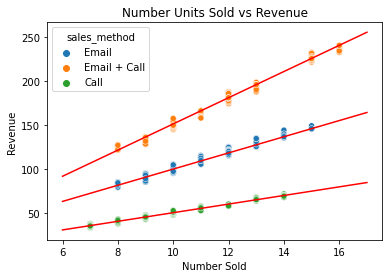

In [453]:
#making sure we filled correctly
sns.scatterplot(x = 'nb_sold', y = 'revenue', data = df, hue = 'sales_method')
plt.xlabel('Number Sold')
plt.ylabel('Revenue')
plt.title('Number Units Sold vs Revenue')
X_plot_ec = np.linspace(6, 17, 100)
Y_plot_ec = a_email_call*X_plot_ec+b_email_call
plt.plot(X_plot_ec, Y_plot_ec, color = 'r')

X_plot_e = np.linspace(6, 17, 100)
Y_plot_e = a_email*X_plot_e+b_email
plt.plot(X_plot_e, Y_plot_e, color = 'r')

X_plot_c = np.linspace(6, 17, 100)
Y_plot_c = a_call*X_plot_c+b_call
plt.plot(X_plot_c, Y_plot_c, color = 'r')

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [455]:
df.years_as_customer.describe()

count    15000.000000
mean         4.965933
std          5.044952
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

[]

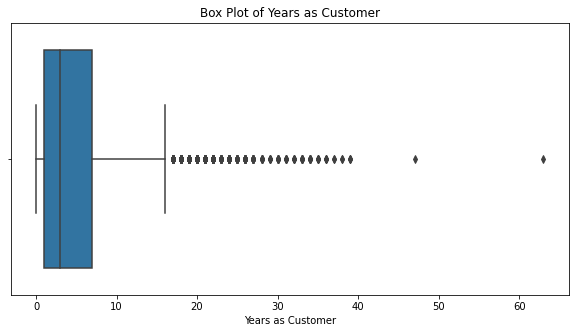

In [456]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'years_as_customer', data = df)
plt.xlabel('Years as Customer')
plt.title('Box Plot of Years as Customer')

plt.plot()

In [457]:
df[df.years_as_customer > 40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


Two extreme outliers for years as customer that appear incorrect based on company founding year of 1984

In [458]:
df.nb_site_visits.describe()

count    15000.000000
mean        24.990867
std          3.500914
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         41.000000
Name: nb_site_visits, dtype: float64

[]

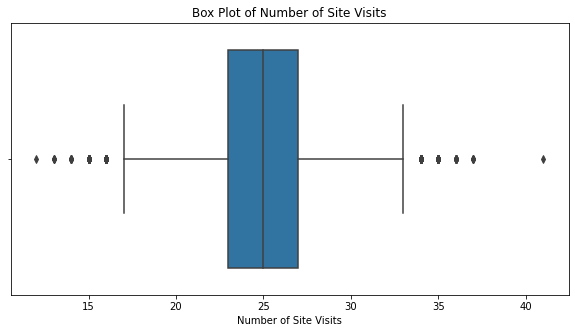

In [459]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'nb_site_visits', data = df)
plt.xlabel('Number of Site Visits')
plt.title('Box Plot of Number of Site Visits')

plt.plot()

Text(0.5, 1.0, 'Number Site Visits vs Revenue')

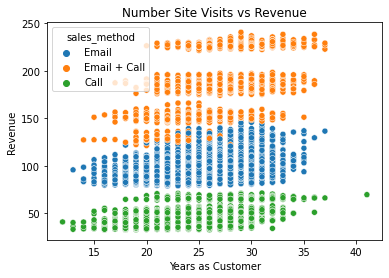

In [492]:
sns.scatterplot(x = 'nb_site_visits', y = 'revenue', data = df, hue = 'sales_method')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.title('Number Site Visits vs Revenue')

[]

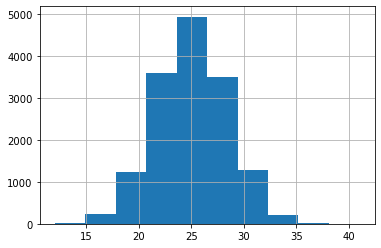

In [461]:
df.nb_site_visits.hist()
plt.plot()

In [462]:
print(df.state.nunique())
df.state.value_counts().tail(10)

50


Idaho            62
New Hampshire    53
Montana          45
Rhode Island     43
South Dakota     41
Alaska           40
Delaware         34
Wyoming          33
North Dakota     30
Vermont          28
Name: state, dtype: int64

Text(0.5, 1.0, 'Count of Number of Sales by State')

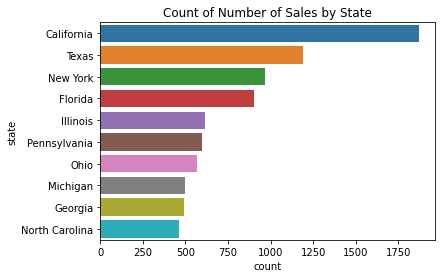

In [463]:
sns.countplot(y= 'state', data=df, order=df.state.value_counts().iloc[:10].index)
plt.title('Count of Number of Sales by State')

All 50 states are represented

## Data Cleaning

In [464]:
df['rev_per_unit'] = df['revenue'] / df['nb_sold']

In [465]:
#replacing values so that there are only three categories as described
df.sales_method.replace({"em + call" : "Email + Call", "email" : "Email"}, inplace = True)
df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [466]:
# replacing wrong values in years as customer with median (3)
# shouldn't have a major affect on the data
df.years_as_customer.mask(df.years_as_customer > 40, round(df.years_as_customer.median(), 0), inplace = True)
df.years_as_customer.describe()

count    15000.000000
mean         4.959000
std          5.010954
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         39.000000
Name: years_as_customer, dtype: float64

## Data Analysis and Viz

### How many customers were there for each sales method?

[]

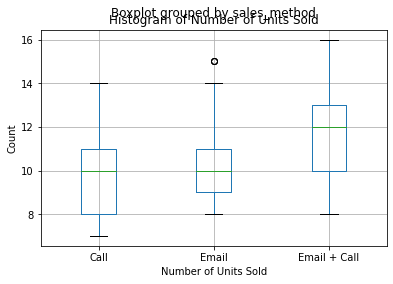

In [467]:
df.boxplot(column = 'nb_sold', by = 'sales_method')
plt.xlabel('Number of Units Sold')
plt.ylabel('Count')
plt.title('Histogram of Number of Units Sold')
plt.plot()

Text(0.5, 1.0, 'Number Units Sold vs Revenue')

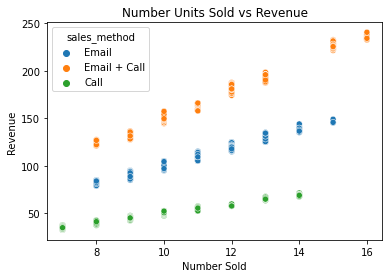

In [468]:
sns.scatterplot(x = 'nb_sold', y = 'revenue', data = df, hue = 'sales_method')
plt.xlabel('Number Sold')
plt.ylabel('Revenue')
plt.title('Number Units Sold vs Revenue')

In [469]:
df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

Some sort of systematic missing data. Revenue missing most for email + call data.

[]

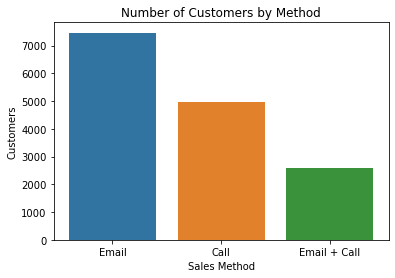

In [470]:
sns.countplot(x = 'sales_method', order = ['Email', 'Call', 'Email + Call'], data = df)
plt.xlabel('Sales Method')
plt.ylabel('Customers')
plt.title('Number of Customers by Method')
plt.plot()

In [471]:
#could have countplots side by side?

### What does the spread of the revenue look like overall? And for each method?

In [472]:
df_revenue

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,rev_per_unit
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,90.991692,0,24,Arizona,NaN
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470000,1,28,Kansas,15.03
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.550000,6,26,Wisconsin,4.78
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,100.090861,3,25,Indiana,NaN
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.490000,0,28,Illinois,10.05
...,...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.820000,0,22,Pennsylvania,5.08
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.330000,1,27,Kansas,5.23
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.870000,4,22,West Virginia,4.98
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.900000,2,27,New Jersey,4.99


In [473]:
df[df.revenue.isnull()].sales_method.value_counts()

Series([], Name: sales_method, dtype: int64)

[]

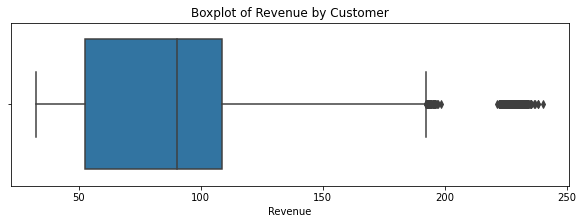

In [474]:
plt.figure(figsize=(10, 3))
sns.boxplot(x = 'revenue', data = df )
plt.xlabel('Revenue')
plt.title('Boxplot of Revenue by Customer')
plt.plot()

[]

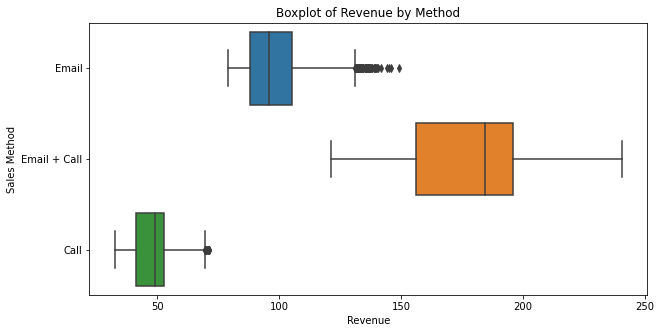

In [475]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'revenue', y = 'sales_method', data = df )
plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.title('Boxplot of Revenue by Method')
plt.plot()

### Was there any difference in revenue over time for each of the methods?

In [476]:
df_revenue.groupby('sales_method')['revenue'].agg('sum')

sales_method
Call            243605.325264
Email           720870.996744
Email + Call    447865.373440
Name: revenue, dtype: float64

In [477]:
#sum of revenue is important
df_revenue.groupby(['sales_method', 'week'])['revenue'].agg('sum')

sales_method  week
Call          1        27314.774486
              2        36203.299833
              3        38785.938201
              4        53397.442717
              5        57139.579334
              6        30764.290694
Email         1       244751.881639
              2       147855.160252
              3       106116.971190
              4       116214.200661
              5        80324.306644
              6        25608.476359
Email + Call  1        18232.007039
              2        29051.385739
              3        51921.849213
              4        85102.378547
              5       139430.267653
              6       124127.485251
Name: revenue, dtype: float64

In [489]:
#revenue by state
state_revenue = pd.DataFrame(df_revenue.groupby(['state'])['revenue'].agg('mean'))
state_revenue

,revenue
state,
Alabama,97.210975
Alaska,92.283628
Arizona,92.477424
Arkansas,91.847414
California,92.879657
Colorado,92.734422
Connecticut,98.065588
Delaware,102.395765
Florida,94.352934


In [478]:
#sum of revenue is important
sum_revenue = pd.DataFrame(df_revenue.groupby(['sales_method', 'week'])['revenue'].agg('sum'))
sum_revenue_pivot = sum_revenue.reset_index().pivot_table(index = 'week', values = 'revenue', columns = 'sales_method', aggfunc = 'sum')

[]

<Figure size 720x432 with 0 Axes>

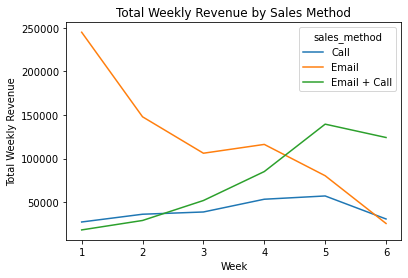

In [479]:
plt.figure(figsize=(10, 6))
sum_revenue_pivot.plot(legend = True)
plt.xlabel('Week')
plt.ylabel('Total Weekly Revenue')
plt.title('Total Weekly Revenue by Sales Method')
plt.plot()

In [480]:
#count of revenue is also important
count_revenue = df_revenue.groupby(['sales_method', 'week'])['revenue'].agg('count')
count_revenue_pivot = count_revenue.reset_index().pivot_table(index = 'week', values = 'revenue', columns = 'sales_method', aggfunc = 'sum')

[]

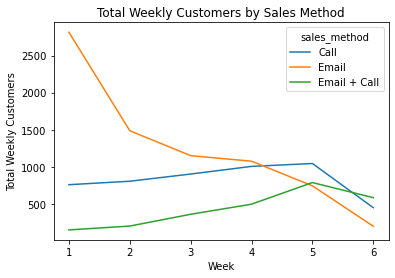

In [481]:
count_revenue_pivot.plot(legend = True)
plt.xlabel('Week')
plt.ylabel('Total Weekly Customers')
plt.title('Total Weekly Customers by Sales Method')
plt.plot()
plt.plot()

In [482]:
#avg revenue is also important
avg_revenue = df.groupby(['sales_method', 'week'])['revenue'].agg('mean')
avg_revenue_pivot = avg_revenue.reset_index().pivot_table(index = 'week', values = 'revenue', columns = 'sales_method', aggfunc = 'mean')

[]

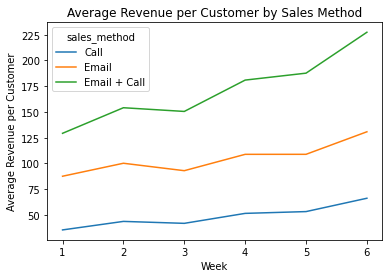

In [483]:
avg_revenue_pivot.plot(legend = True)
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.title('Average Revenue per Customer by Sales Method')
plt.plot()
plt.plot()

In [484]:
sum_units = pd.DataFrame(df.groupby(['sales_method', 'week'])['nb_sold'].agg('sum'))
sum_units_pivot = sum_units.reset_index().pivot_table(index = 'week', values = 'nb_sold', columns = 'sales_method', aggfunc = 'sum')

[]

<Figure size 720x432 with 0 Axes>

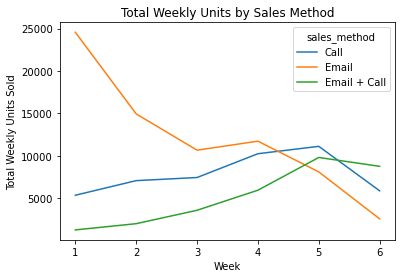

In [485]:
plt.figure(figsize=(10, 6))
sum_units_pivot.plot(legend = True)
plt.xlabel('Week')
plt.ylabel('Total Weekly Units Sold')
plt.title('Total Weekly Units by Sales Method')
plt.plot()

In [486]:
avg_rev_unit = pd.DataFrame(df.groupby(['sales_method', 'week'])['rev_per_unit'].agg('mean'))
avg_rev_unit_pivot = avg_rev_unit.reset_index().pivot_table(index = 'week', values = 'rev_per_unit', columns = 'sales_method', aggfunc = 'mean')

[]

<Figure size 720x432 with 0 Axes>

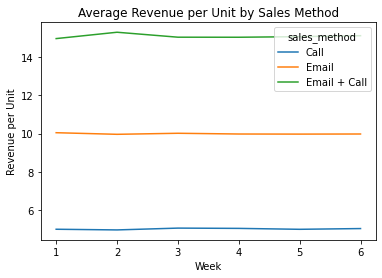

In [487]:
plt.figure(figsize=(10, 6))
avg_rev_unit_pivot.plot(legend = True)
plt.xlabel('Week')
plt.ylabel('Revenue per Unit')
plt.title('Average Revenue per Unit by Sales Method')
plt.plot()

## Business Metric

The business wants to have successful product launches to know if they should continue to make and sell the product. We believe that the business should monitor the early weeks of a launch to determine if the products in a launch are still worth making. Therefore, we recommend the business track total revenue and number of units sold each week.

In [499]:
total_units = pd.DataFrame(df.groupby(['week'])['revenue'].agg('sum'))
total_units

,revenue
week,
1,292295.225267
2,214740.823775
3,198525.125324
4,258214.353853
5,284063.160161
6,187975.236261


[]

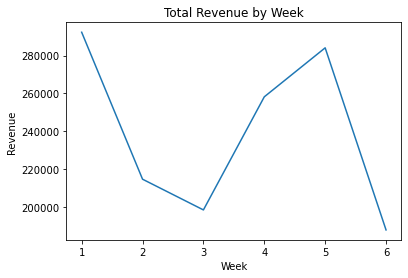

In [504]:
total_units.plot(legend = False)
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Total Revenue by Week')
plt.plot()